In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Reshape, add
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import regularizers
from skimage.util import random_noise
import cv2
import keras
import os
from PIL import Image
import datetime
from tensorflow.keras.callbacks import TensorBoard
from keras.models import model_from_json

In [2]:
PATH=r'B:\Major\finalDataset\clean'
PATH2=r'B:\Major\finalDataset\smudged'
directory=os.listdir(PATH)
directory2=os.listdir(PATH2)
directory.sort()
directory2.sort()

In [3]:
X_train=[]
for file in directory:
    img=cv2.imread("{}/{}".format(PATH,file),0)
    # print(img)
    try:
      # img=cv2.resize(img)
      X_train.append(img)
    except:
      pass

In [4]:
X_train=np.array(X_train)
X_train.shape

(1044, 256, 256)

In [5]:
y_train=[]
for file in directory2:
    # print(file)
    img=cv2.imread("{}/{}".format(PATH2,file),0)
    # print(img)
    try:
      # img=cv2.resize(img)
      y_train.append(img)
    except:
      pass

In [6]:
y_train=np.array(y_train)
y_train.shape

(1044, 256, 256)

In [7]:
X_train = X_train/255.0
y_train=y_train/255.0

In [8]:
shape=X_train.shape

In [9]:
X_train=X_train.reshape(shape[0],shape[1],shape[2],1)
y_train=y_train.reshape(shape[0],shape[1],shape[2],1)

In [10]:
layers=[2,3]
nodes=[32,64,128]

In [11]:
for l in layers:
  model=Sequential()
  input_img = keras.Input(shape=(256, 256, 1))
    #encoder
  for n1 in range(0,3):
    x = Conv2D(nodes[n1], (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    # print(nodes[n1])
    for n2 in range(0,3):
      y = Conv2D(nodes[n2], (3, 3), activation='relu', padding='same')(x)
      y = MaxPooling2D((2, 2), padding='same')(y)
      if l==3:
        for n3 in range(0,3):
          z = Conv2D(nodes[n3], (3, 3), activation='relu', padding='same')(y)
          z = MaxPooling2D((2, 2), padding='same')(z)
          z = Conv2D(nodes[n3], (3, 3), activation='relu', padding='same')(z)
          z = UpSampling2D((2, 2))(z)
          z = Conv2D(nodes[n2], (3, 3), activation='relu', padding='same')(z)
          z = UpSampling2D((2, 2))(z)
          z = Conv2D(nodes[n1], (3, 3), activation='relu', padding='same')(z)
          z = UpSampling2D((2, 2))(z)
          decoded = Conv2D(1, (3, 3), activation='sigmoid',padding='same')(z)

          autoencoder = keras.Model(input_img, decoded)
          autoencoder.compile(optimizer='adamax', loss='binary_crossentropy')
          autoencoder.summary()
          autoencoder.fit(y_train[350:500], X_train[350:500],epochs=5,batch_size=16,shuffle=True)
      else:
        z = Conv2D(nodes[n2], (3, 3), activation='relu', padding='same')(y)
        z = UpSampling2D((2, 2))(z)
        a = Conv2D(nodes[n1], (3, 3), activation='relu', padding='same')(z)
        a = UpSampling2D((2, 2))(a)
        decoded = Conv2D(1, (3, 3), activation='sigmoid',padding='same')(a)

        autoencoder = keras.Model(input_img, decoded)
        autoencoder.compile(optimizer='adamax', loss='mse')
        autoencoder.summary()
        autoencoder.fit(y_train[350:500], X_train[350:500],epochs=5,batch_size=16,shuffle=True)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 128, 128, 32)      0     

In [11]:
tf.__version__

'2.4.1'

In [12]:
X_train.shape

(1044, 256, 256, 1)

In [13]:
y_train.shape

(1044, 256, 256, 1)

In [14]:
model=Sequential()

In [20]:
from time import time
from keras.utils.vis_utils import plot_model
from keras.utils.vis_utils import model_to_dot

In [21]:
tensorboard = TensorBoard(log_dir='B:\Major\git code\ImageProcessing\logs\{}'.format(time()))

In [22]:
input_img = keras.Input(shape=(256, 256, 1))
    #encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same', name = 'Conv_1')(input_img)
x = MaxPooling2D((2, 2), padding='same', name = 'MaxPool_1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv_2')(x)
encoded = MaxPooling2D((2, 2), padding='same', name = 'MaxPool_2')(x)
#decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same', name = 'Conv_3')(encoded)
x = UpSampling2D((2, 2), name = 'UpSample_1')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name = 'Conv_4')(x)
x = UpSampling2D((2, 2), name = 'UpSample_2')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy', 'mse', 'mae','Precision'])
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 1)]     0         
_________________________________________________________________
Conv_1 (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
MaxPool_1 (MaxPooling2D)     (None, 128, 128, 32)      0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 128, 128, 64)      18496     
_________________________________________________________________
MaxPool_2 (MaxPooling2D)     (None, 64, 64, 64)        0         
_________________________________________________________________
Conv_3 (Conv2D)              (None, 64, 64, 64)        36928     
_________________________________________________________________
UpSample_1 (UpSampling2D)    (None, 128, 128, 64)      0   

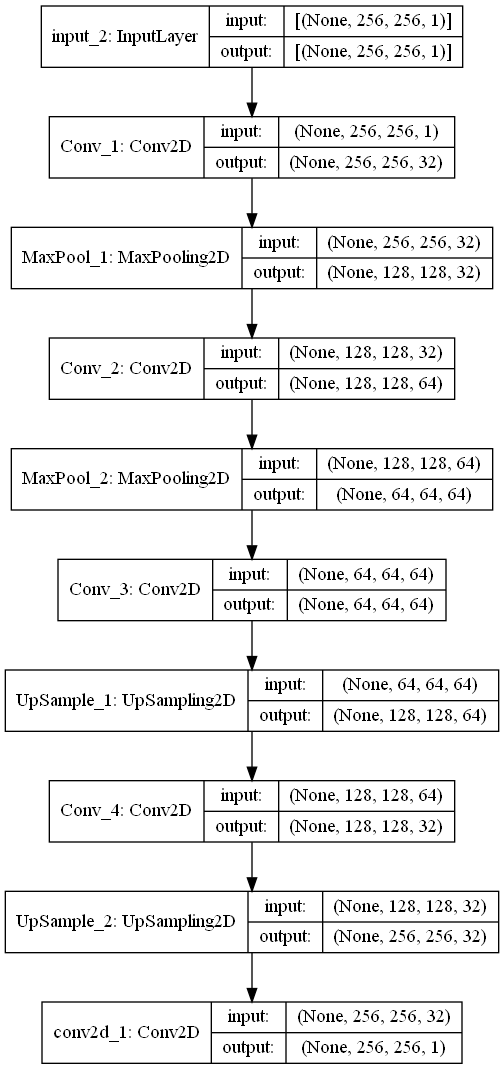

In [23]:
plot_model(autoencoder, to_file=r'B:\Major\git code\ImageProcessing\Models\model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
autoencoder.fit(y_train, X_train,
                epochs=50,
                batch_size=16,
                shuffle=True,
                callbacks=[tensorboard])

Epoch 1/50
66/66 [==============================] - 109s 2s/step - loss: 0.3488 - accuracy: 0.7565 - mse: 0.0988 - mae: 0.2217 - precision: 0.9552
Epoch 2/50
66/66 [==============================] - 111s 2s/step - loss: 0.0868 - accuracy: 0.8428 - mse: 0.0159 - mae: 0.0431 - precision: 0.9945
Epoch 3/50
66/66 [==============================] - 103s 2s/step - loss: 0.0650 - accuracy: 0.8471 - mse: 0.0085 - mae: 0.0273 - precision: 0.9981
Epoch 4/50
66/66 [==============================] - 105s 2s/step - loss: 0.0562 - accuracy: 0.8513 - mse: 0.0060 - mae: 0.0213 - precision: 0.9988
Epoch 5/50
66/66 [==============================] - 106s 2s/step - loss: 0.0513 - accuracy: 0.8530 - mse: 0.0045 - mae: 0.0177 - precision: 0.9993
Epoch 6/50
66/66 [==============================] - 138s 2s/step - loss: 0.0490 - accuracy: 0.8543 - mse: 0.0038 - mae: 0.0159 - precision: 0.9994
Epoch 7/50
66/66 [==============================] - 134s 2s/step - loss: 0.0477 - accuracy: 0.8532 - mse: 0.0033 - mae

In [24]:
json_model = autoencoder.to_json()
json_file = open(r'B:\Major\git code\ImageProcessing\Models\SmudgeRemovalV6\smudge_autoencoderV7.json', 'w')
json_file.write(json_model)
# saving model weights
autoencoder.save_weights(r'B:\Major\git code\ImageProcessing\Models\SmudgeRemovalV6\smudge_autoencoder_weightsV7.h5', 'w')

In [24]:
PATH=r'B:\Major\validationDataset\validationDataset\clean'
PATH2=r'B:\Major\validationDataset\validationDataset\smudged'
directory=os.listdir(PATH)
directory2=os.listdir(PATH2)
directory.sort()
directory2.sort()

In [25]:
X_train=[]
for file in directory:
    img=cv2.imread("{}/{}".format(PATH,file),0)
    try:
      X_train.append(img)
    except:
      pass

In [26]:
y_train=[]
for file in directory:
    img=cv2.imread("{}/{}".format(PATH2,file),0)
    try:
      y_train.append(img)
    except:
      pass

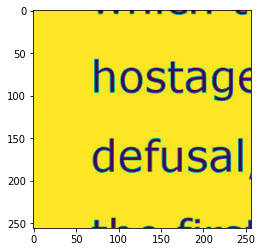

In [27]:
plt.imshow(X_train[0])

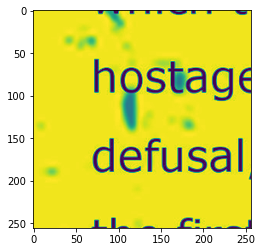

In [28]:
plt.imshow(y_train[0])

In [29]:
def apply_unsharpen(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image = Image.fromarray(image.astype('uint8'))
    new_image = image.filter(ImageFilter.UnsharpMask(radius=1, percent=150))
    new_image = np.array(new_image)
    return new_image

In [30]:
def apply_gaussian_unsharpen(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    figure_size = 9
    image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
    image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
#     image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    image2 = Image.fromarray(image2.astype('uint8'))
    new_image = image2.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
    return np.array(new_image)

In [31]:
def apply_laplacian(image):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    image = cv2.filter2D(image, -1, kernel)
    return image

In [32]:
def apply_gamma(image):
    k=1.8
    image = 255 * (image/255)**k
    return image

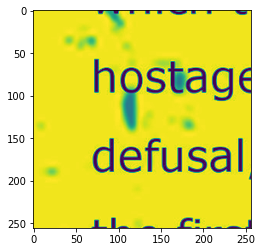

In [33]:
# for i in range(0, len(y_train)):
#     y_train[i] = apply_unsharpen(y_train[i])
#     y_train[i] = apply_gaussian_unsharpen(y_train[i])
#     y_train[i] = apply_laplacian(y_train[i])
#     y_train[i] = apply_gamma(y_train[i])
#     y_train[i] = cv2.cvtColor(y_train[i], cv2.COLOR_BGR2GRAY)
plt.imshow(y_train[0])

In [34]:
X_train=np.array(X_train)
y_train=np.array(y_train)
y_train.shape

(288, 256, 256)

In [35]:
X_train = X_train/255.0
y_train = y_train/255.0

In [36]:
shape=X_train.shape
X_train=X_train.reshape(shape[0],shape[1],shape[2],1)
y_train=y_train.reshape(shape[0],shape[1],shape[2],1)

In [37]:
PATH3=r'B:\Major\model'
model = 'smudge_autoencoderV7.json'
weight = 'smudge_autoencoder_weightsV7.h5'

In [38]:
json_file = open(r'{}\{}'.format(PATH3, model), 'r')
json_model = model_from_json(json_file.read())
json_model.load_weights(r'{}\{}'.format(PATH3, weight))

In [39]:
json_model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy', 'mse', 'mae','Precision'])

In [40]:
result = json_model.evaluate(y_train, X_train, batch_size=1)

288/288 [==============================] - 21s 70ms/step - loss: 0.0418 - accuracy: 0.8348 - mse: 7.7757e-04 - mae: 0.0075 - precision: 1.0000


In [41]:
test_image = json_model.predict(y_train[0].reshape(1,256,256,1)).reshape(256, 256)

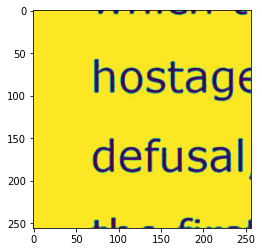

In [42]:
cv2.imwrite(r'B:\Major\datast\filter_test\vt1.png'.format(PATH), test_image*255)
plt.imshow(test_image)

In [43]:
PATH=r'B:\Major\model'
os.listdir(PATH)

['smudge_autoencoder.json',
 'smudge_autoencoderV2.json',
 'smudge_autoencoderV4.json',
 'smudge_autoencoderV5.json',
 'smudge_autoencoderV6.json',
 'smudge_autoencoderV7.json',
 'smudge_autoencoder_weights.h5',
 'smudge_autoencoder_weightsV2.h5',
 'smudge_autoencoder_weightsV4.h5',
 'smudge_autoencoder_weightsV5.h5',
 'smudge_autoencoder_weightsV6.h5',
 'smudge_autoencoder_weightsV7.h5']

In [44]:
PATH2=r'B:\Major\datast'
os.listdir(PATH2)

['filter_test',
 'in.png',
 'in2.png',
 'in3.png',
 'in4.png',
 'output',
 'output_test1 - Copy.png',
 'output_test1.png',
 'output_test10.png',
 'output_test2.png',
 'output_test3.png',
 'output_test4.png',
 'output_test5.png',
 'output_test6.png',
 'output_test7.png',
 'output_test8.png',
 'output_test9.png',
 'test1.png',
 'test10.jpg',
 'test10.png',
 'test2.png',
 'test3.png',
 'test4.png',
 'test5.png',
 'test6.png',
 'test7.png',
 'test8.png',
 'test9.png']

In [45]:
PATH3=r'B:\Major\datast\output'


In [46]:
model = 'smudge_autoencoderV2.json'
weight = 'smudge_autoencoder_weightsV2.h5'

In [47]:
slice_size = 256
input_file_name = 'test9.png'
print("{}\{}".format(PATH2, input_file_name))

B:\Major\datast\test9.png


(1024, 768)

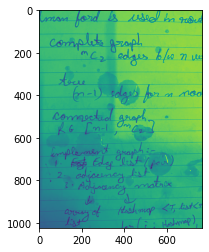

In [48]:
img = cv2.imread("{}\{}".format(PATH2, input_file_name), 0)
plt.imshow(img)
v_res = img.shape[0]
h_res = img.shape[1]
img.shape

In [49]:
def apply_filter(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    figure_size = 9
    image = cv2.GaussianBlur(image, (figure_size, figure_size),0)

    image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    image2 = Image.fromarray(image2.astype('uint8'))

    new_image = image2.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
    new_image = np.array(new_image)
    return new_image

In [50]:
def apply_gamma(image):
    k=1.8
    image = 255 * (image/255)**k
    return image

In [51]:
img = apply_gamma(img)
img

array([[137.59076661, 122.90680074, 130.82497419, ..., 124.2112277 ,
        132.1659966 , 157.33674316],
       [130.82497419, 125.52177157, 134.86625914, ...,  79.01341077,
         74.78755482,  81.16497121],
       [124.2112277 , 132.1659966 , 137.59076661, ..., 163.19370156,
        153.0065657 , 148.73017987],
       ...,
       [ 24.24913319,  25.52894592,  26.83792926, ..., 117.75040624,
        107.73346103, 111.4434203 ],
       [ 24.24913319,  25.52894592,  26.83792926, ..., 125.52177157,
        113.94769477, 112.69246583],
       [ 24.24913319,  25.52894592,  26.83792926, ..., 115.20909951,
        110.20056583, 108.96391015]])

In [52]:
def count_blocks(res, slice_size):
  blocks = 0
  if res % slice_size == 0:
    blocks = int(res/slice_size)
  else:
    blocks = (int(res/slice_size)) + 1
  return blocks

In [53]:
def resizeImage(img, v_res, h_res, slice_size):
  v_res = count_blocks(v_res, slice_size) * slice_size
  h_res = count_blocks(h_res, slice_size) * slice_size
  img = cv2.resize(img, (h_res, v_res))
  print(v_res)
  print(h_res)
  return img

1024
768


(1024, 768)

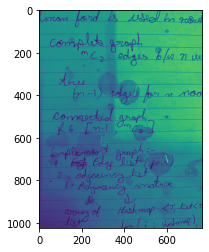

In [54]:
img = resizeImage(img, v_res, h_res, slice_size)
plt.imshow(img)
img.shape

In [55]:
json_file = open(r'{}\{}'.format(PATH, model), 'r')
json_model = model_from_json(json_file.read())
json_model.load_weights(r'{}\{}'.format(PATH, weight))

In [56]:
column = count_blocks(h_res, slice_size)
rows = count_blocks(v_res, slice_size)
print(column)
print(rows)

normalImg = img
newImg = None

hor_split_image = np.hsplit(normalImg, column)
for i in hor_split_image:
    v_split = np.vsplit(i, rows)
    cleanHor = None
    for j in v_split:
        smallClean = json_model.predict(j.reshape(1,256,256,1)).reshape(256, 256)
        if cleanHor is None:
            cleanHor = smallClean
        else:
            cleanHor = np.concatenate((cleanHor, smallClean), axis=0)
    if newImg is None:
        newImg = cleanHor
    else:
        newImg = np.concatenate((newImg, cleanHor), axis=1)

3
4


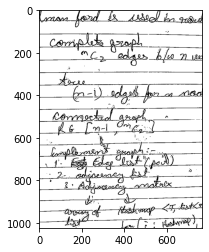

In [57]:
newImg = newImg.reshape(img.shape[0], img.shape[1])
newImg = cv2.resize(newImg, (h_res, v_res))
plt.imshow(newImg, cmap='gray')

In [58]:
cv2.imwrite(r'{}\output_{}'.format(PATH3, input_file_name), newImg*255)

True